In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Verileri yükleme
ages = pd.read_csv('Ages.csv')
data = pd.read_csv('data.csv')

In [3]:
# 'Sample Accession.1' sütununu çıkarma
data = data.drop(columns=['Sample Accession.1'])

# Sütun adlarını yeniden adlandırma
ages.columns = ['Sample_Accession', 'Age']
data.columns = ['Sample_Accession'] + list(data.columns[1:])

# Yaş verilerini veri setine birleştirme
data = data.merge(ages, on='Sample_Accession')

# İlk birkaç satırı gözlemleyelim
print(data.head())

# Eksik değerlerin kontrolü
print(data.isnull().sum())

# Eksik değerlerin çıkarılması (eğer varsa)
data = data.dropna()

  Sample_Accession  k__Archaea  k__Archaea|p__Euryarchaeota  \
0     SAMN03283266    0.000000                     0.000000   
1     SAMN03283281    0.009764                     0.009764   
2     SAMN03283255    0.004333                     0.004333   
3     SAMN03283260    0.010463                     0.010463   
4     SAMN03283250    0.039591                     0.039591   

   k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
0                                        0.000000   
1                                        0.009764   
2                                        0.004333   
3                                        0.010463   
4                                        0.039591   

   k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
0                                           0.000000                      
1                                           0.009764                      
2                                           0.004333                      
3 

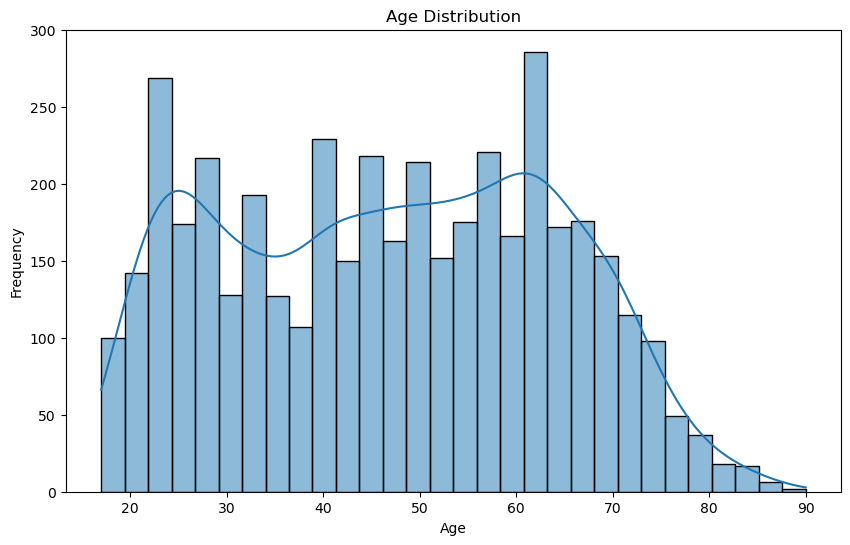

In [4]:
# Yaş dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(ages['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Model için veri hazırlığı

In [5]:
# Sadece sayısal özelliklerin seçilmesi
X = data.drop(columns=['Sample_Accession', 'Age'])
y = data['Age']

In [6]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3419, 3200) (855, 3200) (3419,) (855,)


# Random Forest

In [7]:
# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Tahmin yapma
rf_predictions = rf_model.predict(X_test)

In [9]:
# Performans Metrikleri
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [10]:
print(f'Random Forest MAE: {rf_mae}, R2: {rf_r2}')

Random Forest MAE: 11.407660444293917, R2: 0.32993283836770915


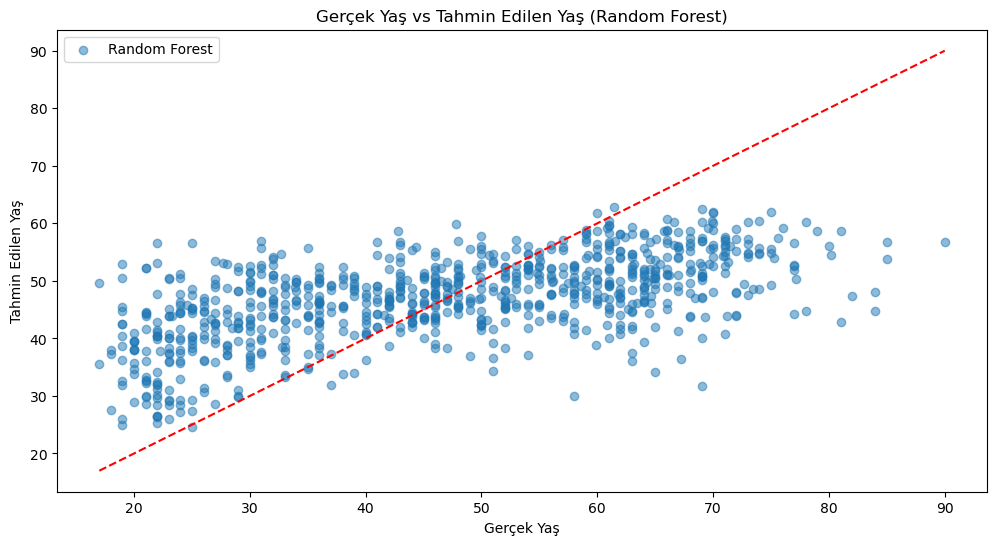

In [11]:
# Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Gerçek Yaş')
plt.ylabel('Tahmin Edilen Yaş')
plt.legend()
plt.title('Gerçek Yaş vs Tahmin Edilen Yaş (Random Forest)')
plt.show()


In [12]:
# Hiperparametre ızgarası
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_features': [7, 19, 21],
    'min_samples_split':[3,7,11],
    'max_depth':[3,7,11]
}

In [13]:
# Grid Search ile en iyi parametreleri bulma
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 11], 'max_features': [7, 19, 21],
                         'min_samples_split': [3, 7, 11],
                         'n_estimators': [50, 100]},
             verbose=2)

In [14]:
# En iyi parametreler ile modeli yeniden eğitme
best_rf_model = rf_grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

In [15]:
# Performans Metrikleri
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)


In [16]:
print(f'Best Random Forest MAE: {best_rf_mae}, R2: {best_rf_r2}')

Best Random Forest MAE: 12.735267914590551, R2: 0.21708470868261853


# Gradient Boost

In [17]:
# Hiperparametre ızgarası
param_grid_gb = {
    'learning_rate': [0.1, 0.01, 0.05],
            'n_estimators': [100,200],
            'max_depth':[2,3,5,8]
}

In [18]:
# Grid Search ile en iyi parametreleri bulma
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 5, 8],
                         'n_estimators': [100, 200]},
             verbose=2)

In [19]:
# En iyi parametreler ile modeli yeniden eğitme
best_gb_model = gb_grid_search.best_estimator_
best_gb_predictions = best_gb_model.predict(X_test)

In [20]:
# Performans Metrikleri
best_gb_mae = mean_absolute_error(y_test, best_gb_predictions)
best_gb_r2 = r2_score(y_test, best_gb_predictions)

In [21]:
print(f'Best Gradient Boosting MAE: {best_gb_mae}, R2: {best_gb_r2}')

Best Gradient Boosting MAE: 10.835411244407762, R2: 0.38203785341672314


# XGB

In [37]:
param_grid_xgb = {'learning_rate': [0.1, 0.01, 0.001],
            'subsample':[0.6, 0.8, 1],
            'n_estimators': [100,500],
            'max_depth':[3,5,7]
}

In [38]:
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb,
                               cv=10,
                               n_jobs=-1,
                               verbose=2)
xgb_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 500],
                         'subsample': [0.6, 0.8, 1]},
             verbose=2)

In [39]:
# En iyi parametreler ile modeli yeniden eğitme
best_xgb_model = xgb_grid_search.best_estimator_

In [40]:
best_xgb_predictions = best_xgb_model.predict(X_test)

In [41]:
# Performans Metrikleri
best_xgb_mae = mean_absolute_error(y_test, best_xgb_predictions)
best_xgb_r2 = r2_score(y_test, best_xgb_predictions)

In [42]:
print(f'Best XGBoost MAE: {best_xgb_mae}, R2: {best_xgb_r2}')

Best XGBoost MAE: 10.549389197415204, R2: 0.39251205133232536


# Sonuç Görselleştirilmesi

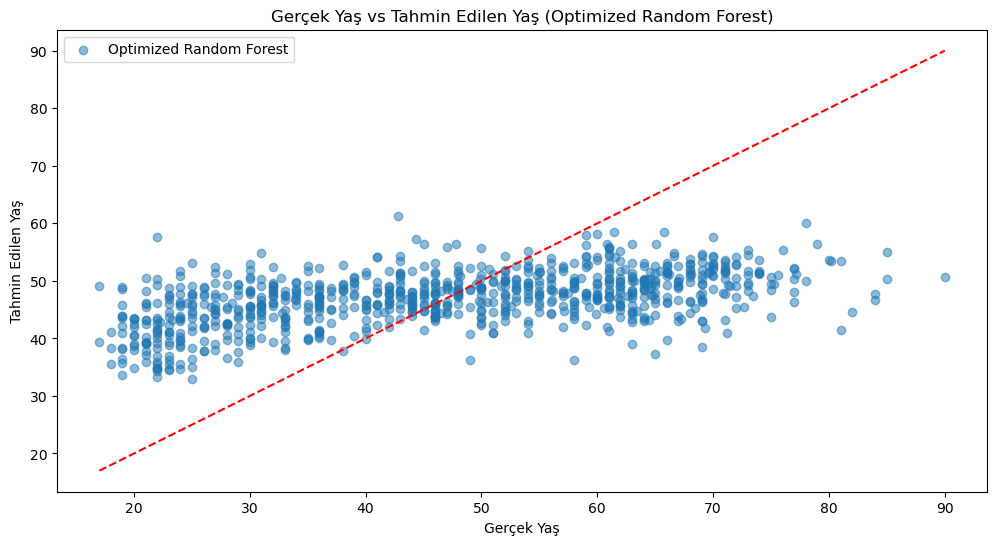

In [43]:
# Random Forest için sonuçların görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_rf_predictions, alpha=0.5, label='Optimized Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Gerçek Yaş')
plt.ylabel('Tahmin Edilen Yaş')
plt.legend()
plt.title('Gerçek Yaş vs Tahmin Edilen Yaş (Optimized Random Forest)')
plt.show()

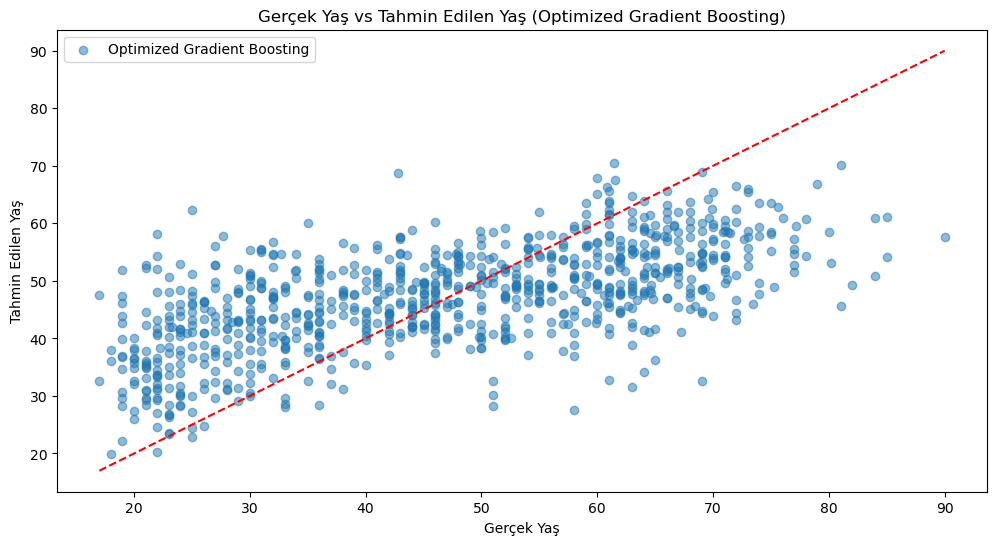

In [44]:
# Gradient Boosting için sonuçların görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_gb_predictions, alpha=0.5, label='Optimized Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Gerçek Yaş')
plt.ylabel('Tahmin Edilen Yaş')
plt.legend()
plt.title('Gerçek Yaş vs Tahmin Edilen Yaş (Optimized Gradient Boosting)')
plt.show()

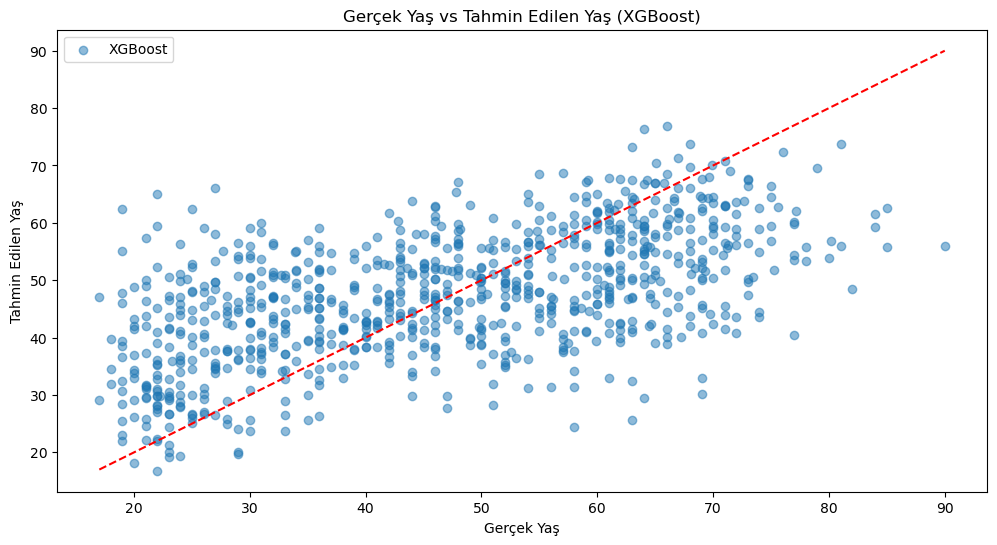

In [45]:
# Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.scatter(y_test, xgb_predictions, alpha=0.5, label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Gerçek Yaş')
plt.ylabel('Tahmin Edilen Yaş')
plt.legend()
plt.title('Gerçek Yaş vs Tahmin Edilen Yaş (XGBoost)')
plt.show()